![grafik.png](attachment:grafik.png)

# WAIA Data Science with Python 2021 - Week 8 Exercises

scikit learn comes with a number of datasets that we can use to develop basic machine learning solutions. In this homework, we will deal with the breast cancer dataset.

Here you can find more information about the dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Import the dataset from scikit-learn into a DataFrame called bc. Note that the load_.. function in scikit learn will not directly return a DataFrame but a Bunch object. Read more about this in the scikit-learn documentation.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
data1=load_breast_cancer()
bc= pd.DataFrame(data=data1.data, columns=data1.feature_names)

Examine the first 5 rows of the dataset and its shape

In [2]:
print(bc.head())
print(bc.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

Now let's add another column called "diagnosis" and assign it the target variable from the dataset.

In [3]:
bc["diagnosis"]=data1['target']

How many benign (1) and malign (0) tumor diagnoses are in the dataset?

In [4]:
bc.groupby('diagnosis').count()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212
1,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357


Is there any missing data?

In [5]:
bc.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

Any apparent outliers?

{'whiskers': [<matplotlib.lines.Line2D at 0x17670b45c40>,
 'caps': [<matplotlib.lines.Line2D at 0x17672b6b2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17670b45970>,
 'medians': [<matplotlib.lines.Line2D at 0x17672b6b7c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x17672b6ba90>,
 'means': []}

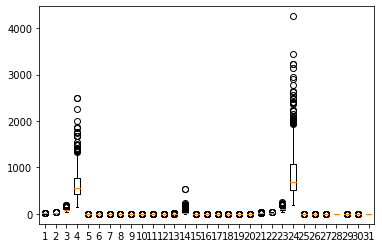

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(bc)

To get a better understanding of the correlation between each column of your dataset, create a scatter matrix of the dataset using seaborn (https://seaborn.pydata.org/examples/scatterplot_matrix.html)

In [7]:
import seaborn as sns
#sns.pairplot(bc, hue="diagnosis")

Plot histgrams for the different radius parameters for the categories malignant and benign to see which features influence the diagnosis. 

<AxesSubplot:xlabel='mean radius', ylabel='Count'>

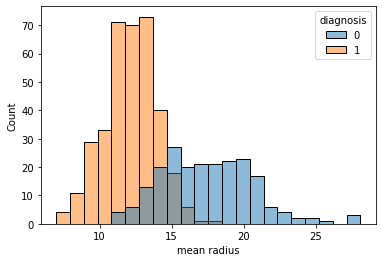

In [8]:
sns.histplot(data=bc, x="mean radius", hue="diagnosis")

Let's try to set up three models using this parameter. Each one should contain one of the all the features containing worst, error and mean in their description. Let's choose a logistic regression algorithm for this. Use train_test_split to subdivide your dataset into training and testing (80%/20% division). Have a look at the accuracy score for the model's performance. (Note: Next week you will learn more about how you can judge your model's performance).

In [9]:
from sklearn.model_selection import train_test_split
training_data, testing_data=train_test_split(bc, test_size=0.8)